<table class="bootrain-notebook-buttons" align="left">
  <td>
  </td>
  <td>
  </td>
  <td>
      <a target="_blank" href="https://colab.research.google.com/drive/1kAlXaH-Sak0g6vhfqVqbZxmf7s4rhT1s">
          <img src="https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/images/colab_logo_32px.png"/>Run in Google Colab
      </a>
  </td>
</table>


Thus far, we have explored and cleaned our data, the next step is to identify the features that we think will be useful in explaining the target variable. This step is called `feature engineering`. In this lesson, we will talk about how we should approach feature engineering and what kind of techniques we can employ.


At this stage of the EDA process, we need to transform our variables into features. In our model, we name the variables that we think are suitable for the study to explain the target variable. Feature engineering is the process of selecting or changing existing variables and creating new variables to be used in our models. Feature engineering is a [broad and complex subject](http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/) and offers the opportunity to gain creativity with your data. Throughout the lesson, we will talk about how to get a feature which is most useful for the analysis of interest. The figure below shows where we are in the overall EDA process:

<img src="https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/images/06_EDA/C07_01.png" width="800" alt="EDA">

As we have emphasized in previous lessons, EDA is an iterative process, and when we encounter a problem with our data during the feature engineering phase, we first need to fix the problem and apply feature engineering techniques to understand if this new variable is useful when we change or create a new one. As usual, we will provide examples to demonstrate the techniques here, but it is worth noting that feature engineering is a vast field and you shouldn not limit yourself to what you see here when working with your data. You can try anything you think will highlight a particular feature in your data set.

We will analyze feature engineering with following topics:

* Converting existing variables
* Creating new variables
* Choosing features

In this lesson, we will cover the first two topics. We will leave the third one to the next lesson.

# 1. Transforming the Features

Converting existing variables is a very common need, and there are many reasons for this. Among them, we focus on:

* Machine learning models can only work with numerical variables. For this reason, categorical variables with text values should be converted to numerical values if possible.
* Some machine learning models only require us to use normally distributed target variables. In order to use such models, we may need to transform our targets as to have normal distribution.
* Some machine learning models are very sensitive to the magnitude of the values. So, we may need to limit the values of the variables within a range. We usually do this by `normalizing` our variables.
* We may want to convert variables into a different unit of measure to help us understand our intuition and understand the data.

Let's start with the first:

## 1.1. Working with Categorical Variables

Since machine learning models work only on numerical data, we need to convert our categorical data to a numerical value. One method for this purpose is called `one-hot encoding`. In one-hot encoding, we create X-1 numerical features, each coded 1 or 0, to obtain information from an X-level categorical variable. Resulting variables that take 0 or 1 for each category are known as `dummy` or `indicator variables`. We can use Pandas' `.get_dummies()` method to apply one-hot encoding to a categorical variable. Please see this [source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) for futher information about `.get_dummies()`

Consider the Movie dataset. The color variable is a categorical variable that takes the values 'color' and 'black and white' only. As the color variable has two categoric levels, only one feature is required to represent all information: If we know that the values 'color' is 0, we also know that the value 'black and white' should be 1. The level without a feature is called a `reference value`.

Let's load our Movie dataset and create dummy variables for the degree variable:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

Let's import the data we corrected and winsorized the missing data in previous lessons and create indicator variables for the color variable.

In [ ]:
movie = pd.read_csv("https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/datasets/movie_winsorize.csv")
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,313.0,134.0,760505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,302.0,134.0,309404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,313.0,134.0,200074175.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,313.0,134.0,448130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,448130642.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,313.0,134.0,NaN


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   color                             5024 non-null   object 
 1   director_name                     4939 non-null   object 
 2   num_critic_for_reviews            4993 non-null   float64
 3   duration                          5028 non-null   float64
 4   director_facebook_likes           4939 non-null   float64
 5   actor_3_facebook_likes            5020 non-null   float64
 6   actor_2_name                      5030 non-null   object 
 7   actor_1_facebook_likes            5036 non-null   float64
 8   gross                             5043 non-null   float64
 9   genres                            5043 non-null   object 
 10  actor_1_name                      5036 non-null   object 
 11  movie_title                       5043 non-null   object 
 12  num_vo

In [ ]:
pd.get_dummies(movie['color'],drop_first=True).head(10)

,Color
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,1


Please note that the `.get_dummies()` method returns one dummy variable for each category, naming the indicator variables with the values of the color variable. However, when we include them in a model, as we explained above, we should not forget to subtract one of the dummy variables! If you have suspicion that we may forget to do this operation, you can set the `drop_first` parameter of the `.get_dummies()` method to True. This subtracts the first category and creates indicative variables for the rest only. Moreover, just running `pd.get_dummies` `movie ["color"]) does not keep indicator variables in the data frame. We can do this using `pd.concat()`:


As you can remember from the Pandas lesson, we add the `axis=1` parameter since we combine along with the column.

In [ ]:
movie['numerical_color']=pd.get_dummies(movie['color'],drop_first=True)

In [ ]:
movie['numerical_color'].unique()

array([1, 0], dtype=uint8)

In [ ]:
movie=pd.concat([movie,pd.get_dummies(movie['color'])],axis=1)
movie.head(30)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross,numerical_color,Black and White,Color
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,313.0,134.0,760505847.0,1,0,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,302.0,134.0,309404152.0,1,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,313.0,134.0,200074175.0,1,0,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,313.0,134.0,448130642.0,1,0,1
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,448130642.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,313.0,134.0,NaN,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,313.0,132.0,73058679.0,1,0,1
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,313.0,134.0,336530303.0,1,0,1
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,313.0,100.0,200807262.0,1,0,1
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,313.0,134.0,458991599.0,1,0,1
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35

In [ ]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'winsorize_num_critic_for_reviews', 'winsorize_duration',
       'winsorize_gross', 'numerical_color', ' Black and White', 'Color'],
      dtype='object')

## 1.2. Working with Non-Normal Variable

As we mentioned earlier, some machine learning models assume normal distributions for target variables. If the normality is an assumption in a model, non-normal variables needs to be transformed into a normal distributed variable using different methods such as the **square root**, **inverse**, or **log of the variable**. Remember that we discussed this issue in data clearing and outliers lessons. Applying transformations like log transforms not only helps us to get rid of outliers, but also changes the distribution of the variables to which they are applied. However, it is not 100% guaranteed to have normally distributed variable after transformations.

In this lesson that we talked about univariate analysis, we have shown the following graph for the continuous variables in the Movie dataset. Let's compare the distribution of the raw and and the log-transformed data.

In [ ]:
variables=['num_critic_for_reviews','duration','gross']

In [ ]:
winsorize_variables=['winsorize_num_critic_for_reviews', 'winsorize_duration',
       'winsorize_gross']

In [ ]:
!git clone https://github.com/Tylersuard/MagnimindTest.git

Cloning into 'MagnimindTest'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


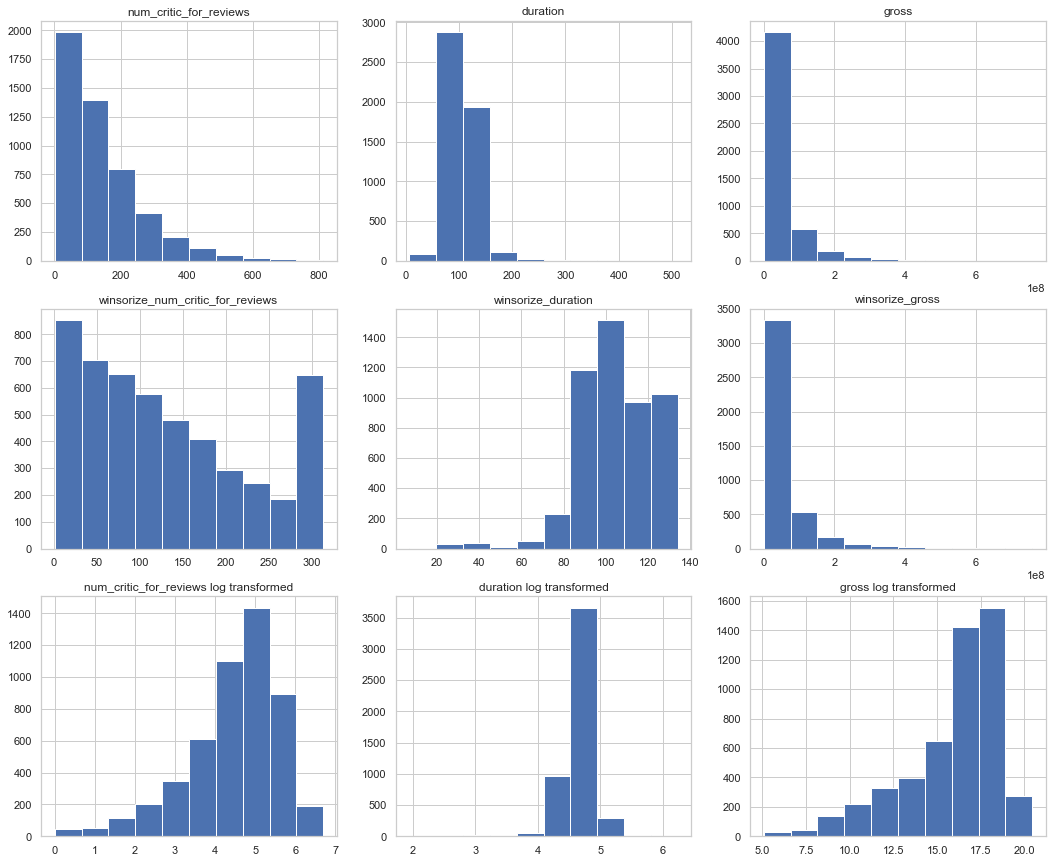

In [ ]:
plt.figure(figsize=(18,15))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.hist(movie[variables[i]])
    plt.title(variables[i])
for i in range(3):
    plt.subplot(3,3,i+4)
    plt.hist(movie[winsorize_variables[i]])
    plt.title(winsorize_variables[i])
for i in range(3):
    plt.subplot(3,3,i+7)
    plt.hist(np.log(movie[variables[i]]))
    plt.title(variables[i]+' log transformed')



In the last line of the plots, we have distributions of the log-transformed data.Apparently, the log transformation of the three variables above changed the distribution of the variables, so that these distributions get more closer to the normal distribution. 